In [1]:
# For Data
import pandas as pd
import numpy as np

#  For Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud

# For NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For Styling
plt.style.use('default')

C:\Users\himan\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv('Corona_NLP_train.csv',encoding='latin-1')
df['TweetAt'] = pd.to_datetime(df['TweetAt'])
df['Length'] = df['OriginalTweet'].apply(len)
df.head(2)

C:\Users\himan\AppData\Local\Temp\ipykernel_17000\1229065471.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])


UserName  ScreenName Location    TweetAt  \
0      3799       48751   London 2020-03-16   
1      3800       48752       UK 2020-03-16   

                                       OriginalTweet Sentiment  Length  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral     111  
1  advice Talk to your neighbours family to excha...  Positive     237

Text(0.5, 1.0, 'Missing values of each columns')

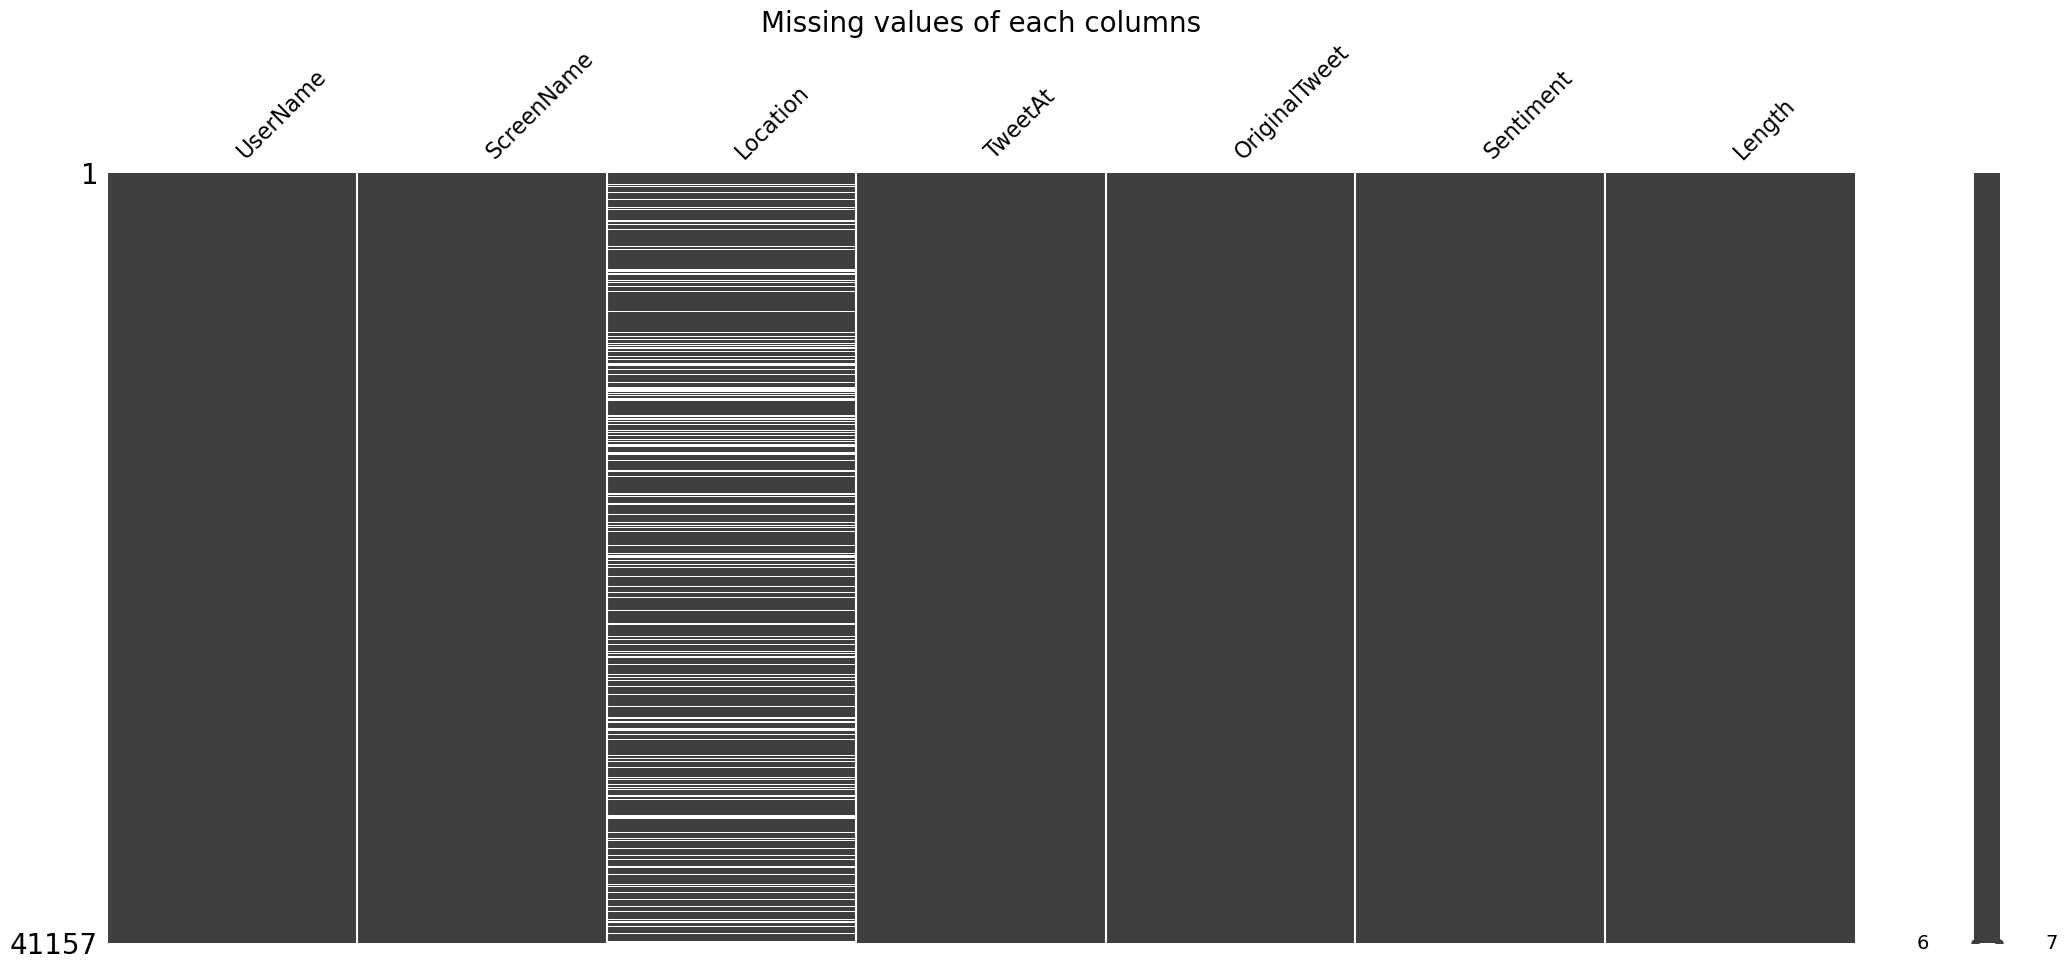

In [3]:
msno.matrix(df)
plt.title('Missing values of each columns',fontsize=20)

Text(0.5, 1.0, 'Monthly distribution of tweets')

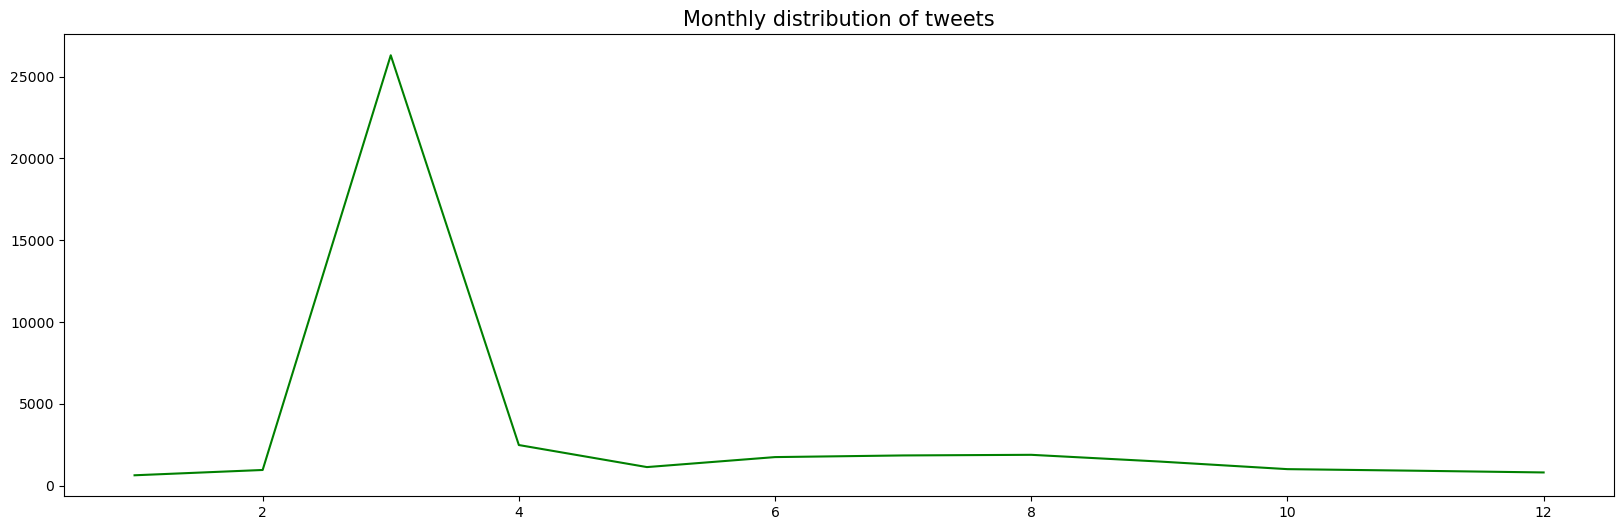

In [4]:
time = df.groupby(['TweetAt']).size()
monthly = df['TweetAt'].dt.month.value_counts().sort_index()
plt.figure(figsize=(20,6))
sns.lineplot(x=monthly.index, y = monthly.values, color='green')
plt.title('Monthly distribution of tweets', fontsize=15)

In [5]:
fig = px.line(df, 
              x=time.index, 
              y=time.values, 
              title = 'date of tweets',
              template='simple_white')

fig.update_layout(
    xaxis_title = 'Dates',
    yaxis_title = 'Count of Tweets',
    font=dict(size=17,family="Times New Roman"),)
fig.show()

In [6]:
location = df['Location'].value_counts()[:10]
fig = px.bar(x=location.index,y=location.values,text=location.values,
       color = location.index, color_discrete_sequence=px.colors.sequential.deep,
        title = 'Distribution of Top 10 Locations',
        template = 'simple_white')

fig.update_traces(textposition='inside',
                  textfont_size=11)

fig.update_layout(
    xaxis_title = 'Locations',
    yaxis_title = 'Count of Tweets',
    font=dict(size=17,family="Times New Roman"),)

fig.show()

In [7]:
sentiment = df["Sentiment"].value_counts()
fig = px.pie(values=sentiment.values, 
             names=sentiment.index,
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

In [8]:
positive = df.loc[np.where(df['Sentiment'] == 'Positive')].reset_index()
negative = df.loc[np.where(df['Sentiment'] == 'Negative')].reset_index()
neutral = df.loc[np.where(df['Sentiment'] == 'Neutral')].reset_index()
extremely_positive = df.loc[np.where(df['Sentiment'] == 'Extremely Positive')].reset_index()
extremely_negative = df.loc[np.where(df['Sentiment'] == 'Extremely Negative')].reset_index()

In [9]:
hist_data = [extremely_positive['Length'],positive['Length'],neutral['Length'],
             negative['Length'],extremely_negative['Length']]

group_labels = ['extremely_positive','positive','neutral','negative','extremely_negative']

colors = ['navy', 'blue', 'lightblue','lightsalmon','red']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors = colors)

# Add title
fig.update_layout(title_text='Length distribution each sentiments', template = 'simple_white')
fig.show()

In [10]:
df

UserName  ScreenName                      Location    TweetAt  \
0          3799       48751                        London 2020-03-16   
1          3800       48752                            UK 2020-03-16   
2          3801       48753                     Vagabonds 2020-03-16   
3          3802       48754                           NaN 2020-03-16   
4          3803       48755                           NaN 2020-03-16   
...         ...         ...                           ...        ...   
41152     44951       89903  Wellington City, New Zealand 2020-04-14   
41153     44952       89904                           NaN 2020-04-14   
41154     44953       89905                           NaN 2020-04-14   
41155     44954       89906                           NaN 2020-04-14   
41156     44955       89907  i love you so much || he/him 2020-04-14   

                                           OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1      advice Talk to your neighbours family to excha...            Positive   
2      Coronavirus Australia: Woolworths to give elde...            Positive   
3      My food stock is not the only one which is emp...            Positive   
4      Me, ready to go at supermarket during the #COV...  Extremely Negative   
...                                                  ...                 ...   
41152  Airline pilots offering to stock supermarket s...             Neutral   
41153  Response to complaint not provided citing COVI...  Extremely Negative   
41154  You know itÂs getting tough when @KameronWild...            Positive   
41155  Is it wrong that the smell of hand sanitizer i...             Neutral   
41156  @TartiiCat Well new/used Rift S are going for ...            Negative   

       Length  
0         111  
1         237  
2         131  
3         306  
4         310  
...       ...  
41152     102  
41153     138  
41154     136  
41155     111  
41156     255  

[41157 rows x 7 columns]

In [11]:
import re
df["OriginalTweet"].str.lower()
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'http\S+', '', x))
import string
df['OriginalTweet'] = df['OriginalTweet'].str.translate(str.maketrans('', '', string.punctuation))
df['OriginalTweet'] = df['OriginalTweet'].str.replace('\d+', '')
df['OriginalTweet'] = df['OriginalTweet'].str.strip()
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: ' '.join(x.split()))

C:\Users\himan\AppData\Local\Temp\ipykernel_17000\385173873.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



In [12]:
df

UserName  ScreenName                      Location    TweetAt  \
0          3799       48751                        London 2020-03-16   
1          3800       48752                            UK 2020-03-16   
2          3801       48753                     Vagabonds 2020-03-16   
3          3802       48754                           NaN 2020-03-16   
4          3803       48755                           NaN 2020-03-16   
...         ...         ...                           ...        ...   
41152     44951       89903  Wellington City, New Zealand 2020-04-14   
41153     44952       89904                           NaN 2020-04-14   
41154     44953       89905                           NaN 2020-04-14   
41155     44954       89906                           NaN 2020-04-14   
41156     44955       89907  i love you so much || he/him 2020-04-14   

                                           OriginalTweet           Sentiment  \
0                    MeNyrbie PhilGahan Chrisitv and and             Neutral   
1      advice Talk to your neighbours family to excha...            Positive   
2      Coronavirus Australia Woolworths to give elder...            Positive   
3      My food stock is not the only one which is emp...            Positive   
4      Me ready to go at supermarket during the COVID...  Extremely Negative   
...                                                  ...                 ...   
41152  Airline pilots offering to stock supermarket s...             Neutral   
41153  Response to complaint not provided citing COVI...  Extremely Negative   
41154  You know itÂs getting tough when KameronWilds...            Positive   
41155  Is it wrong that the smell of hand sanitizer i...             Neutral   
41156  TartiiCat Well newused Rift S are going for on...            Negative   

       Length  
0         111  
1         237  
2         131  
3         306  
4         310  
...       ...  
41152     102  
41153     138  
41154     136  
41155     111  
41156     255  

[41157 rows x 7 columns]

In [13]:
text = ' '.join(df['OriginalTweet'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


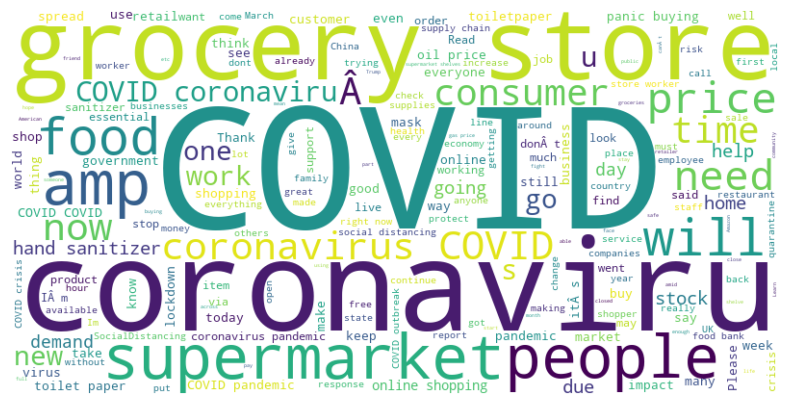

In [14]:
# Plot the Word Cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


In [16]:
vector = CountVectorizer()
X = vector.fit_transform(df['OriginalTweet'])

In [17]:
X

<41157x58749 sparse matrix of type '<class 'numpy.int64'>'
	with 1055711 stored elements in Compressed Sparse Row format>

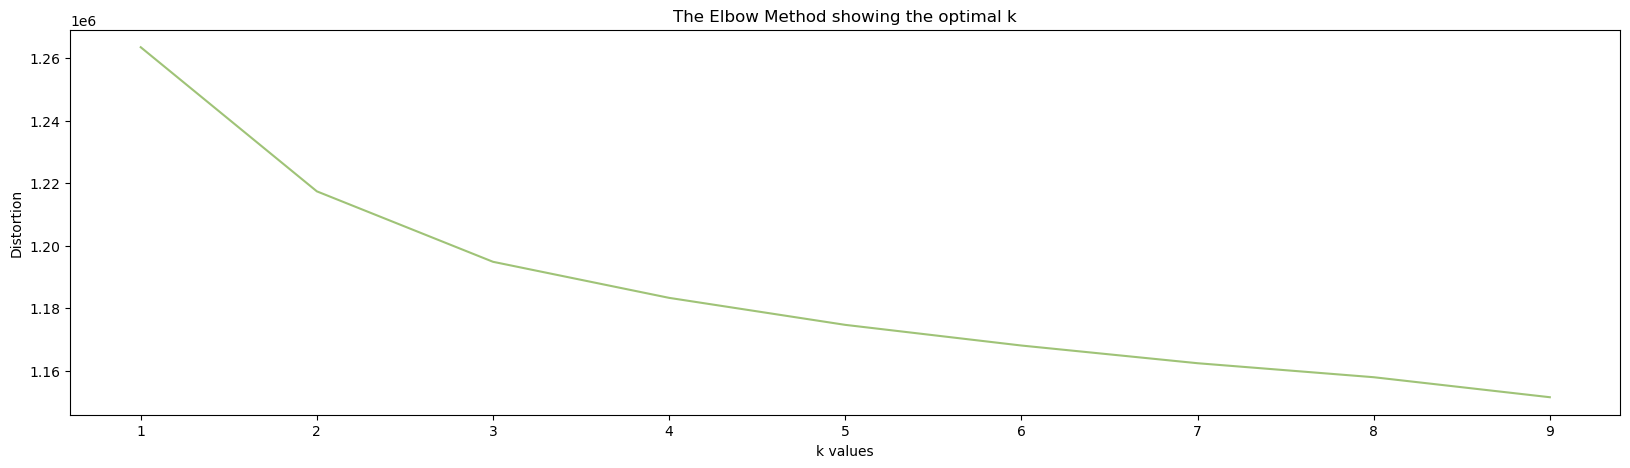

In [18]:
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k,random_state=7)
    kmean.fit(X)
    distortions.append(kmean.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, distortions, '-',color='g')
plt.xlabel('k values')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
from sklearn.decomposition import TruncatedSVD
n_components = 2  # Choose the desired number of components
svd = TruncatedSVD(n_components=n_components)
X = svd.fit_transform(X)

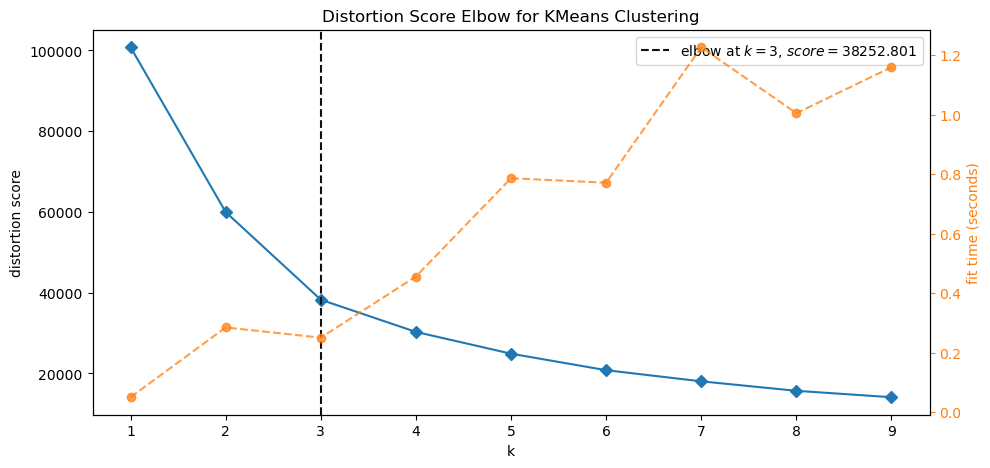

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10),size=(1080, 500))

visualizer.fit(X)        
visualizer.show() 

In [21]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)
pred_labels = kmeanModel.labels_;
pred_centers = kmeanModel.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers


x         y
0  3.262312  1.071635
1  2.860783 -1.105490
2  1.165939 -0.115700

In [22]:
pred_labels

array([2, 1, 2, ..., 2, 2, 1])

In [23]:
pred_centers

array([[ 3.26231195,  1.07163459],
       [ 2.86078343, -1.10549037],
       [ 1.16593865, -0.1156999 ]])

In [24]:
dfcl = pd.DataFrame(columns=['x','y','label'])
dfcl['x'] = X[:,0]
dfcl['y'] = X[:,1]
dfcl['label'] = kmeanModel.labels_
dfcl

x         y  label
0      0.535746 -0.204345      2
1      1.805959 -1.302938      1
2      0.872976 -0.775510      2
3      2.477905 -0.222080      1
4      2.880577  0.311687      0
...         ...       ...    ...
41152  0.976468 -0.692280      2
41153  1.615773 -1.399853      1
41154  0.557629 -0.205700      2
41155  2.322259 -0.007047      2
41156  2.732305 -0.558986      1

[41157 rows x 3 columns]

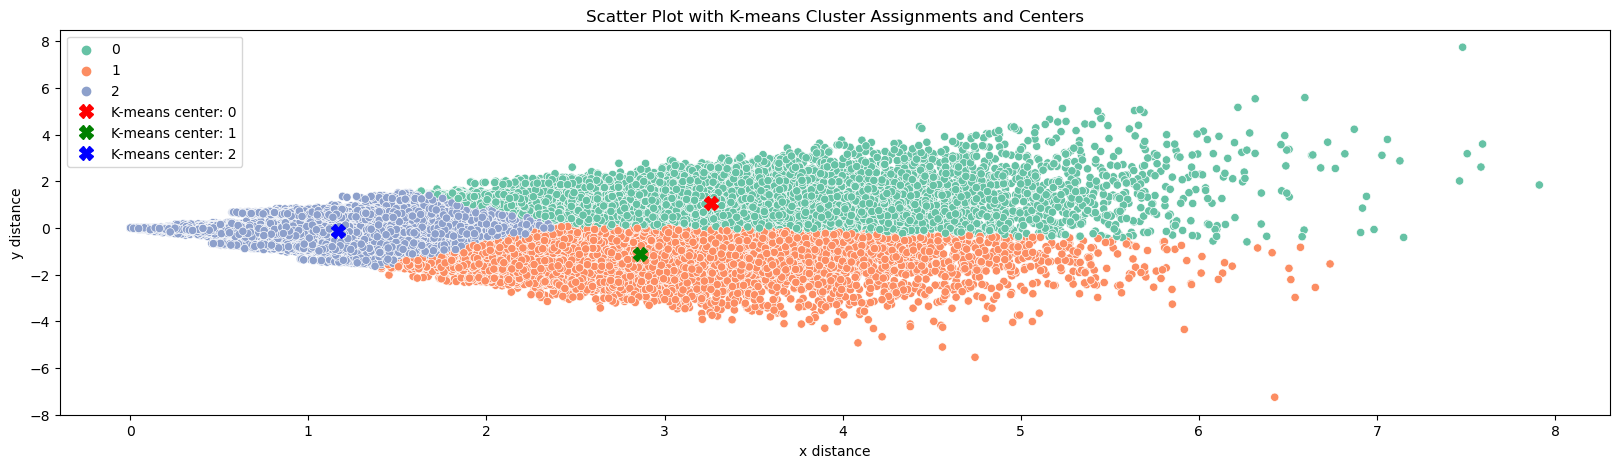

In [28]:
plt.figure(figsize=(20, 5))

# Scatter plot of data points with K-means cluster assignments
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred_labels.tolist(), palette='Set2')

# Plot K-means centers
colors = ['red', 'green', 'blue', 'yellow']
for i, color in enumerate(df_centers.index.tolist()):
    plt.plot(df_centers['x'][i], df_centers['y'][i], 'X', label=f'K-means center: {i}', color=colors[i], markersize=10)

plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('Scatter Plot with K-means Cluster Assignments and Centers')
plt.legend()
plt.show()